In [1]:
import os, sys
os.chdir(os.path.abspath(".."))  # move up to project root
sys.path.insert(0, os.getcwd())


In [2]:
from datetime import date
from src.news_fetcher import fetch_news
from src.sentiment_model import analyze_sentiment
from src.signal_analysis import merge_sentiment_with_returns
from src.signal_analysis import normalize_sentiment

START = date(2025, 9, 30)
END = date(2025, 10, 7)

# 1️⃣ Fetch news
df_news = fetch_news("AAPL", start_date=START, end_date=END)

# 2️⃣ Analyze sentiment
df_news = analyze_sentiment(df_news)

# 3️⃣ Clean and aggregate daily sentiment
df_daily = normalize_sentiment(df_news)

# Explanation: converts categorical sentiments to a daily numeric “sentiment index”

# 4️⃣ Merge with stock returns
merged = merge_sentiment_with_returns(df_daily, "AAPL", start_date=START, end_date=END)
merged


Device set to use mps:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
[*********************100%***********************]  1 of 1 completed


,date,sentiment_score,confidence,Adj Close,Close,High,Low,Open,Volume,Return
0,2025-10-02,NaN,0.930546,257.130005,257.130005,258.179993,254.149994,256.579987,42630200,0.006577
1,2025-10-03,NaN,0.974524,258.019989,258.019989,259.239990,253.949997,254.669998,49107000,0.003461
2,2025-10-06,NaN,0.982781,256.690002,256.690002,259.070007,255.050003,257.989990,44292200,-0.005155


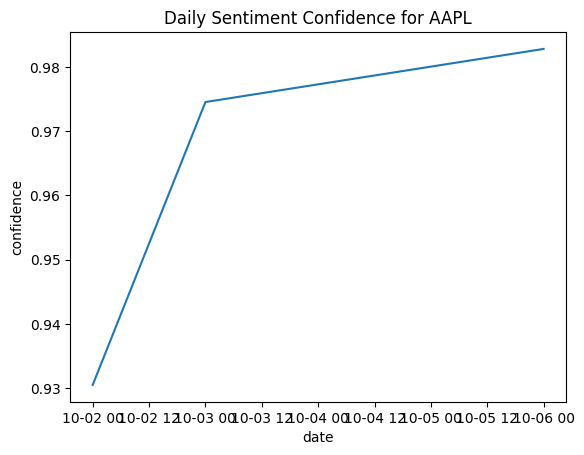

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=merged, x="date", y="confidence")
plt.title("Daily Sentiment Confidence for AAPL")
plt.show()

In [6]:
corr = merged["confidence"].corr(merged["Return"])
print("Sentiment vs Return correlation:", corr)
# This tells you whether positive news tends to precede positive returns


Sentiment vs Return correlation: -0.8018646278296991


In [3]:
merged.columns

Index(['date', 'sentiment_score', 'confidence', 'Adj Close', 'Close', 'High',
       'Low', 'Open', 'Volume', 'Return'],
      dtype='object')

In [ ]:
# testing news_fetcher

from src.news_fetcher import fetch_news

df = fetch_news("Apple stock", from_days=4)
print(df.head())

In [ ]:
# testing sentiment_model

from src.sentiment_model import analyze_sentiment
df = analyze_sentiment(df)
df.head()

In [ ]:
import yfinance as yf
import pandas as pd

def get_stock_returns(ticker, start="2022-01-01"):
    # Force consistent structure
    data = yf.download(ticker, start=start, auto_adjust=False, group_by='column')
    
    # If yfinance returns multi-level columns, flatten them
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    
    data["Return"] = data["Adj Close"].pct_change()
    return data

df_price = get_stock_returns("AAPL")
#df_price["date"] = df.assign(df_price.index.date).drop(columns="Dat")
df_price

In [ ]:
import pandas as pd
df.assign(date=pd.to_datetime(df["publishedAt"]).dt.date).drop(columns="publishedAt")


In [ ]:
# testing signal_analysis

from src.signal_analysis import merge_sentiment_with_returns

merged = merge_sentiment_with_returns(df, "AAPL")
merged.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=merged, x="date", y="confidence")
plt.title("Daily Sentiment Confidence for AAPL")
plt.show()



In [ ]:
corr = merged["confidence"].corr(merged["Return"])
print("Sentiment vs Return correlation:", corr)
